In [1]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt

In [2]:
# tkinter stuff
import tkinter as tk
from tkinter import filedialog
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Result display - Theory

This section will guide you through proper image result display/ </br>
For the purpose of QSM testing we have 3 important steps to show </br>
I. Phase unwrapping: Complex MR signal is composed of Magnitude and Phase. MR phase is proportional to local deviations in the static magnetic field (Hz). Measured phase is a projection of the true phase into the 2pi range. 



In [4]:
# Selecting slice 
def display_nifti_slice(nib_data, slice_number, cbr_title, inf_limit = None, sup_limit = None, xlim = None, ylim = None, cmap = "gray"):
    # Get the data as a numpy array
    img_data = nib_data
    
    # Check if the specified slice number is within bounds
    if slice_number < 0 or slice_number >= img_data.shape[2]:
        print("Slice number out of range. Please select a valid slice number.")
        return

    # Select the specified slice
    slice_data = img_data[:, :, slice_number]
    # Display the slice
    plt.figure(figsize=(6, 6))
    if inf_limit is None and sup_limit is None:
        plt.imshow(slice_data.T, origin='lower')
    else:
        plt.imshow(slice_data.T, cmap=cmap, origin='lower', vmin=inf_limit, vmax=sup_limit)
   
    cbr= plt.colorbar()
    cbr.set_label(cbr_title, rotation = 0, labelpad = 15, fontsize = 15)
    slice_number += 1
    plt.title(f'Slice {slice_number}')

    if xlim is not None:
        # xlim is a tuple with (xmin,xmax)
        plt.xlim(xlim)

    if ylim is not None:
        # xlim is a tuple with (xmin,xmax)
        plt.ylim(ylim)

    plt.axis('off')
    plt.show()



# Showing voxels through echoes


Here we choose voxels to plot through echoes in order to test Phase unwrapping, for phase aliasing explanation and also for FUN!

In [5]:
# First we load the images
path_to_mag =  "E:/msc_data/sc_qsm/data/wb/simulation/pw_full_sim_mag_pro.nii.gz"
path_to_ph = "E:/msc_data/sc_qsm/data/wb/simulation/pw_full_sim_phase_pro.nii.gz"
path_to_fm = ""

In [6]:
mag_img = nib.load(path_to_mag)
mag_data = mag_img.get_fdata()
ph_img = nib.load(path_to_ph)
ph_data = ph_img.get_fdata()


In [ ]:
dimensions = np.array(mag_data.shape)
dimensions

TypeError: Invalid shape (5, 512, 512) for image data

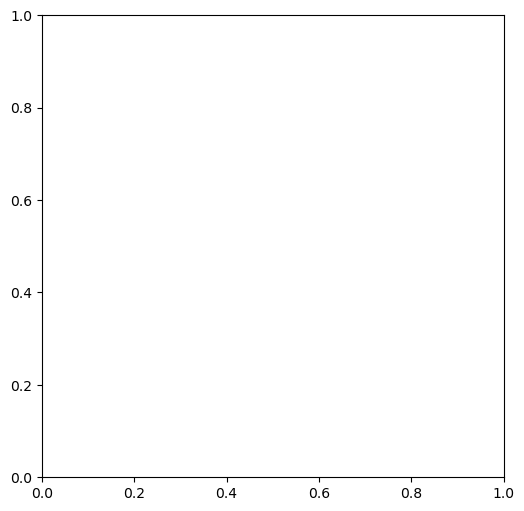

In [28]:
display_nifti_slice(mag_data, 598, 'a', inf_limit=-100, sup_limit=100, cmap = 'jet')
#display_nifti_slice(mag_data, 598, 'a', cmap = 'gray')

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\User\miniconda3\envs\calipso\Lib\tkinter\__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "c:\Users\User\msc_project\Image-processing-strategies\qsm_testing\utils\utils.py", line 30, in load_nifti
    self.image_data = nifti_img.get_fdata()
                      ~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\User\miniconda3\envs\calipso\Lib\site-packages\nibabel\dataobj_images.py", line 374, in get_fdata
    data = np.asanyarray(self._dataobj, dtype=dtype)
  File "c:\Users\User\miniconda3\envs\calipso\Lib\site-packages\nibabel\arrayproxy.py", line 454, in __array__
    arr = self._get_scaled(dtype=dtype, slicer=())
  File "c:\Users\User\miniconda3\envs\calipso\Lib\site-packages\nibabel\arrayproxy.py", line 421, in _get_scaled
    scaled = apply_read_scaling(self._get_unscaled(slicer=slicer), scl_slope, scl_inter)
                                ~~~~~~~~~~~~~~~~~~

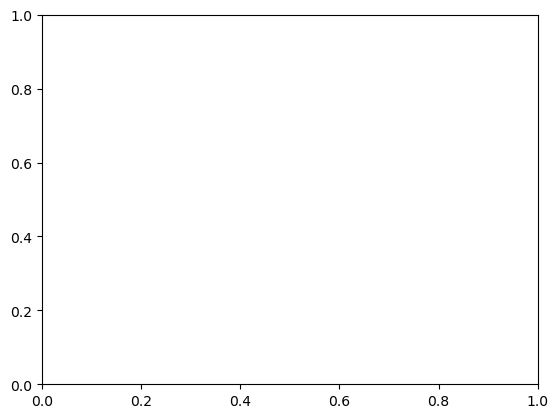

In [4]:
# Selecting voxels
from utils.utils import MRIPixelSelector
root =tk.Tk()
app = MRIPixelSelector(root)
root.mainloop()

# Old tests


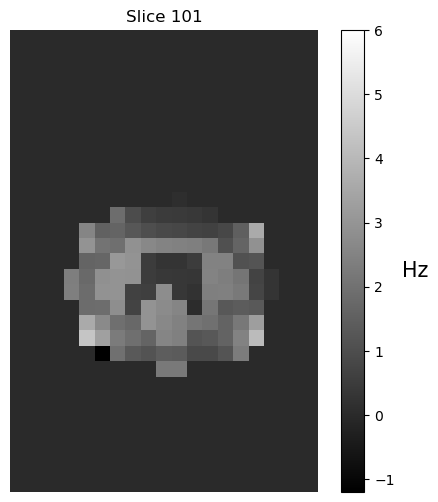

In [8]:
# Select the parameters
# Phase unwrapping:
first_golden_path = "output/1.phase_unwrap_sepia/trial3_nogauss_sc_mask/Sepia_fieldmap.nii.gz"
first_pathX = "output/1.phase_unwrap_sepia/trialX_opt_w/GRAPHCUT/Sepia_fieldmap.nii.gz"
first_pathY = "output/1.phase_unwrap_sepia/trialY_nonlinearfit/Laplacian_MEDI/Sepia_fieldmap.nii.gz"

# Background field removal
second_golden_path = "output/2.bgfr_sepia/trial6_nogauss_dilaSC_LBV/Sepia_localfield.nii.gz"
second_pathX = "output/2.bgfr_sepia/trialX/with_MEDI_RG_FM/Sepia_localfield.nii.gz"

# Dipole inversion
third_golden_path = ""
third_pathX = ""
third_pathy = ""

# Defining square focusing on Spinal Cord
xlim = (40,60)
ylim = (10,40)
# To select the titl of the colorbar remember:
# For Fieldmaps and Local field the unit should be Hz
# For QSM maps it should be in PPM
cbr_name = 'Hz'

############ ########## # ######### # ### ## ##  ##########################################################
display_nifti_slice(second_golden_path, 100, cbr_name, inf_limit = -1.2, sup_limit = 6, xlim = xlim, ylim = ylim)
# The value of the slice number is 1 less than what you see in ITK-snap

In [1]:
# Adding plane option to the code:

# Selecting slice and plane
def display_nifti_slice2(filepath, slice_number, plane='axial', cbr_title='', inf_limit=None, sup_limit=None, xlim=None, ylim=None):

    img = nib.load(filepath)
    
    img_data = img.get_fdata()

    # Define slice based on the selected plane
    if plane == 'axial':
        if slice_number < 0 or slice_number >= img_data.shape[2]:
            print("Slice number out of range for axial plane. Please select a valid slice number.")
            return
        slice_data = img_data[:, :, slice_number]
    elif plane == 'sagittal':
        if slice_number < 0 or slice_number >= img_data.shape[0]:
            print("Slice number out of range for sagittal plane. Please select a valid slice number.")
            return
        slice_data = img_data[slice_number, :, :]
    elif plane == 'coronal':
        if slice_number < 0 or slice_number >= img_data.shape[1]:
            print("Slice number out of range for coronal plane. Please select a valid slice number.")
            return
        slice_data = img_data[:, slice_number, :]
    else:
        print("Invalid plane selection. Please choose from 'axial', 'sagittal', or 'coronal'.")
        return

    # Display the slice
    plt.figure(figsize=(6, 6))
    if inf_limit is None and sup_limit is None:
        plt.imshow(slice_data.T, cmap='gray', origin='lower')
    else:
        plt.imshow(slice_data.T, cmap='gray', origin='lower', vmin=inf_limit, vmax=sup_limit)

    cbr = plt.colorbar()
    cbr.set_label(cbr_title, rotation=0, labelpad=15, fontsize=15)
    slice_number += 1
    plt.title(f'{plane.capitalize()} Slice {slice_number}')

    if xlim is not None:
        # xlim is a tuple with (xmin, xmax)
        plt.xlim(xlim)

    if ylim is not None:
        # ylim is a tuple with (ymin, ymax)
        plt.ylim(ylim)

    plt.axis('off')
    plt.show()


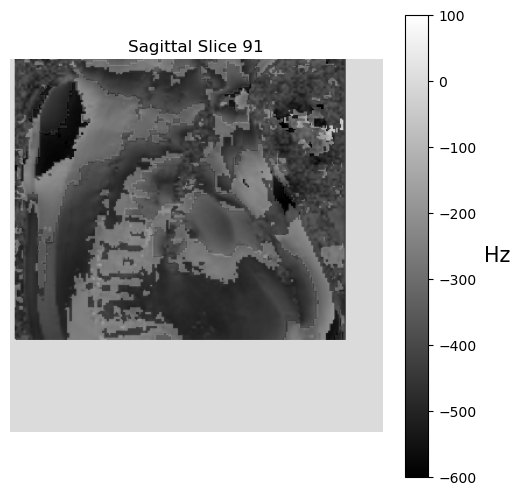

In [11]:
long_path = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_2_echos/FM_tests/ROMEO/temp_uncertain/B0_temp_uncertain.nii"
 
display_nifti_slice2(long_path, 90, plane="sagittal", cbr_title = 'Hz', inf_limit=-600, sup_limit=100)